# Testing GPT-4-Turbo generated text reading level using Flesch-Kincaid readability test

Currently in our edtech product we use two seperate text generators for passages. One that generates a passage to use in creating resources and another levels any text input. I would like to use different measurements to check how close is the generated text by gpt-4-turbo.

Approach:
1. Gather initial data(Generated texts and their structure)
3. Convert score to mean of grade range
4. Compare where the model thinks it was outputting to where it actually did according to reability score
5. Compare if the texts that was leveled after generation improved in its score


# Data

The data was created in 3 ways. 
1. The leveled text guidelines were pulled from Planning Period's text leveler database
2. The Generated text and leveled Text were API calls to openAI
3. The Flesch-Kincaid score was calcualted using the textstat lib for both texts

Characteristics of each call:
- Each model calls has a system prompt message and a final prompt message
- The prompts are the only information that the call gets, we do not use RAG and any other context.
Steps:
- The first call generates text that is either fiction or nonfiction. It is given specific directions that help it tailor the texts for generating passages for k-12 education.
- The second call is given directions to level the passage that was created in the first call. The idea is that if it is not focusing on creating a passage, it can focus on leveling to proper reading level

limitations:
- grades range from 5th-12th



# Features 

- __Type of Passage__
- Original Grade
- Leveled Grade
- __Topic__
- Original Text
- Leveled Text
- Original Word Count
- Original Sentence Structure
- Original Vocabulary
- Original Content
- Leveled Word Count
- Leveled Sentence Structure
- Leveled Vocabulary
- Leveled Content
- Original Text Flesch Kincaid Readability Score
- Leveled Text Flesch Kincaid Readability Score

Most of these features are for reference and were __not__ given to the model in the api call. The ones that are __bolded__ are the only ones that were given as context in the api call


# What is Flesch-Kincaid 

The Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand. There are two tests: the Flesch Reading-Ease, and the Flesch–Kincaid Grade Level. Although they use the same core measures (word length and sentence length), they have different weighting factors.

The results of the two tests correlate approximately inversely: a text with a comparatively high score on the Reading Ease test should have a lower score on the Grade-Level test. Rudolf Flesch devised the Reading Ease evaluation; somewhat later, he and J. Peter Kincaid developed the Grade Level evaluation for the United States Navy.

Below we can see the ranges for each level

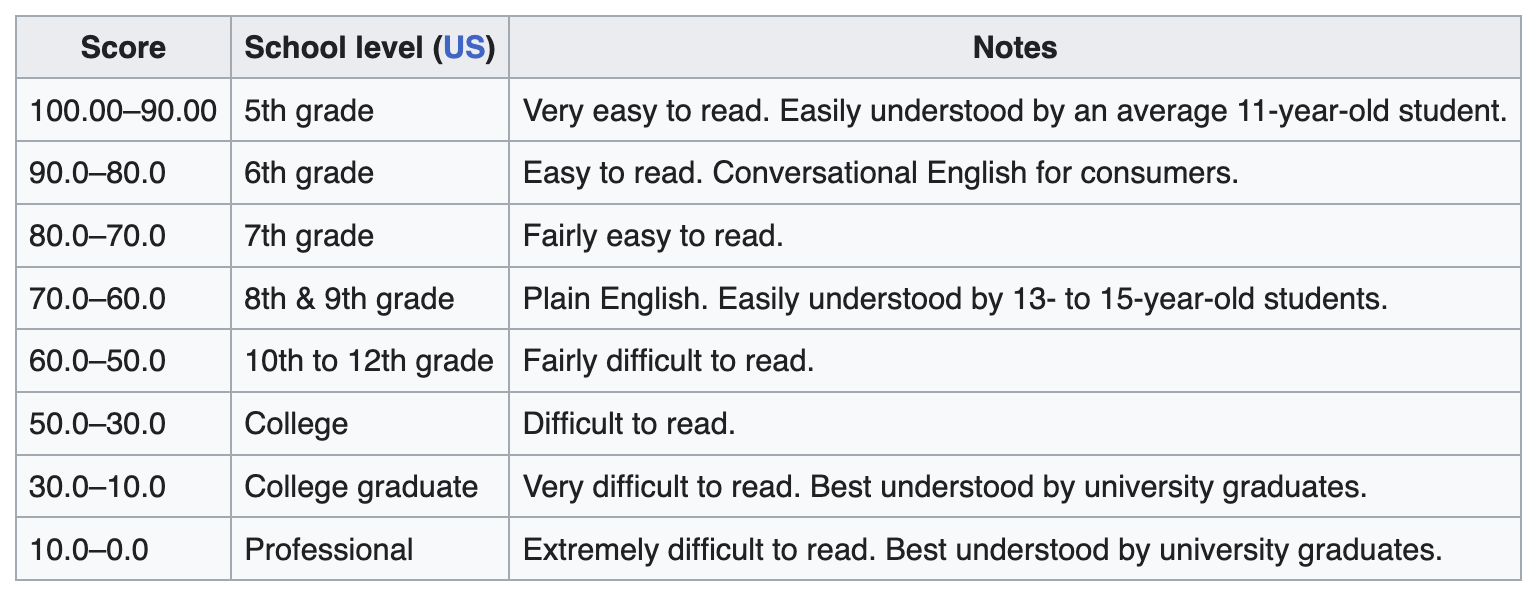

source - https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Ensures that plots appear in the notebook itself
%matplotlib inline


In [4]:
df = pd.read_csv('updated_data.csv')  
display(df.head())

,Type of Passage,Original Grade,Leveled Grade,Topic,Original Text,Leveled Text,Original Word Count,Original Sentence Structure,Original Vocabulary,Original Content,Leveled Word Count,Leveled Sentence Structure,Leveled Vocabulary,Leveled Content,Original Text Flesch Kincaid Readability Score,Leveled Text Flesch Kincaid Readability Score
0,Fiction,5th,7th,A Lost Treasure,"Unfortunately, without the text of ""A Lost Tre...","**Hypothetical Example: ""A Lost Treasure""**\n\...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,62.78,56.35
1,Fiction,5th,7th,Time Travel Adventure,"Unfortunately, I can't assist with rewriting o...",### Time Travel Adventure\n\nSam and Jess stum...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,72.76,56.25
2,Fiction,5th,7th,A Haunted House Mystery,"To proceed with your request, I'll need the te...","To proceed with your requests, I will need the...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,49.65,39.67
3,Fiction,5th,7th,An Epic Battle Between Kingdoms,**An Epic Battle Between Kingdoms**\n\nA long ...,**An Epic Battle Between Kingdoms**\n\nIn a di...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,75.20,57.37
4,Fiction,5th,7th,Survival on an Alien Planet,**Survival on an Alien Planet**\n\nWhen Jamie ...,**Survival on an Alien Planet**\n\nJamie and h...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,84.68,76.11


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Type of Passage                                 500 non-null    object 
 1   Original Grade                                  500 non-null    object 
 2   Leveled Grade                                   500 non-null    object 
 3   Topic                                           500 non-null    object 
 4   Original Text                                   500 non-null    object 
 5   Leveled Text                                    497 non-null    object 
 6   Original Word Count                             500 non-null    object 
 7   Original Sentence Structure                     500 non-null    object 
 8   Original Vocabulary                             500 non-null    object 
 9   Original Content                           

None

# Converting the readability score to a mean grade

In [9]:
def map_fk_score_to_grade(score):
    if score >= 90:
        return '5th grade'
    elif score >= 80:
        return '6th grade'
    elif score >= 70:
        return '7th grade'
    elif score > 65:
        return '8th grade'  
    elif score > 60:
        return '9th grade'  
    elif score > 55:
        return '10th grade'  
    elif score > 50:
        return '11th grade'  
    elif score > 30:
        return '12th grade'  
    elif score > 20:
        return 'College undergraduate' 
    elif score > 10:
        return 'College graduate'  
    else:
        return 'Professional'  


df['Original Text School Level'] = df['Original Text Flesch Kincaid Readability Score'].apply(map_fk_score_to_grade)
df['Leveled Text School Level'] = df['Leveled Text Flesch Kincaid Readability Score'].apply(map_fk_score_to_grade)

display(df.head())

,Type of Passage,Original Grade,Leveled Grade,Topic,Original Text,Leveled Text,Original Word Count,Original Sentence Structure,Original Vocabulary,Original Content,Leveled Word Count,Leveled Sentence Structure,Leveled Vocabulary,Leveled Content,Original Text Flesch Kincaid Readability Score,Leveled Text Flesch Kincaid Readability Score,Original Text School Level,Leveled Text School Level
0,Fiction,5th,7th,A Lost Treasure,"Unfortunately, without the text of ""A Lost Tre...","**Hypothetical Example: ""A Lost Treasure""**\n\...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,62.78,56.35,9th grade,10th grade
1,Fiction,5th,7th,Time Travel Adventure,"Unfortunately, I can't assist with rewriting o...",### Time Travel Adventure\n\nSam and Jess stum...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,72.76,56.25,7th grade,10th grade
2,Fiction,5th,7th,A Haunted House Mystery,"To proceed with your request, I'll need the te...","To proceed with your requests, I will need the...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,49.65,39.67,12th grade,12th grade
3,Fiction,5th,7th,An Epic Battle Between Kingdoms,**An Epic Battle Between Kingdoms**\n\nA long ...,**An Epic Battle Between Kingdoms**\n\nIn a di...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,75.20,57.37,7th grade,10th grade
4,Fiction,5th,7th,Survival on an Alien Planet,**Survival on an Alien Planet**\n\nWhen Jamie ...,**Survival on an Alien Planet**\n\nJamie and h...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,84.68,76.11,6th grade,7th grade


In [14]:
df.head()

,Type of Passage,Original Grade,Leveled Grade,Topic,Original Text,Leveled Text,Original Word Count,Original Sentence Structure,Original Vocabulary,Original Content,Leveled Word Count,Leveled Sentence Structure,Leveled Vocabulary,Leveled Content,Original Text Flesch Kincaid Readability Score,Leveled Text Flesch Kincaid Readability Score,Original Text School Level,Leveled Text School Level,Original Grade Num,FK Original Grade Num
0,Fiction,5th,7th,A Lost Treasure,"Unfortunately, without the text of ""A Lost Tre...","**Hypothetical Example: ""A Lost Treasure""**\n\...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,62.78,56.35,9th grade,10th grade,5,13
1,Fiction,5th,7th,Time Travel Adventure,"Unfortunately, I can't assist with rewriting o...",### Time Travel Adventure\n\nSam and Jess stum...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,72.76,56.25,7th grade,10th grade,5,12
2,Fiction,5th,7th,A Haunted House Mystery,"To proceed with your request, I'll need the te...","To proceed with your requests, I will need the...",250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,49.65,39.67,12th grade,12th grade,5,14
3,Fiction,5th,7th,An Epic Battle Between Kingdoms,**An Epic Battle Between Kingdoms**\n\nA long ...,**An Epic Battle Between Kingdoms**\n\nIn a di...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,75.20,57.37,7th grade,10th grade,5,11
4,Fiction,5th,7th,Survival on an Alien Planet,**Survival on an Alien Planet**\n\nWhen Jamie ...,**Survival on an Alien Planet**\n\nJamie and h...,250-300 words,Greater variation in sentence structure,Introduction to figurative language,Expanding on character development and introdu...,375-425 words,Rich variation with emphasis on rhetorical dev...,Advanced vocabulary with more sophisticated la...,Exploration of complex themes and multiple sto...,84.68,76.11,6th grade,7th grade,5,11


# Plotting Original Texts Score for fiction and nonfiction

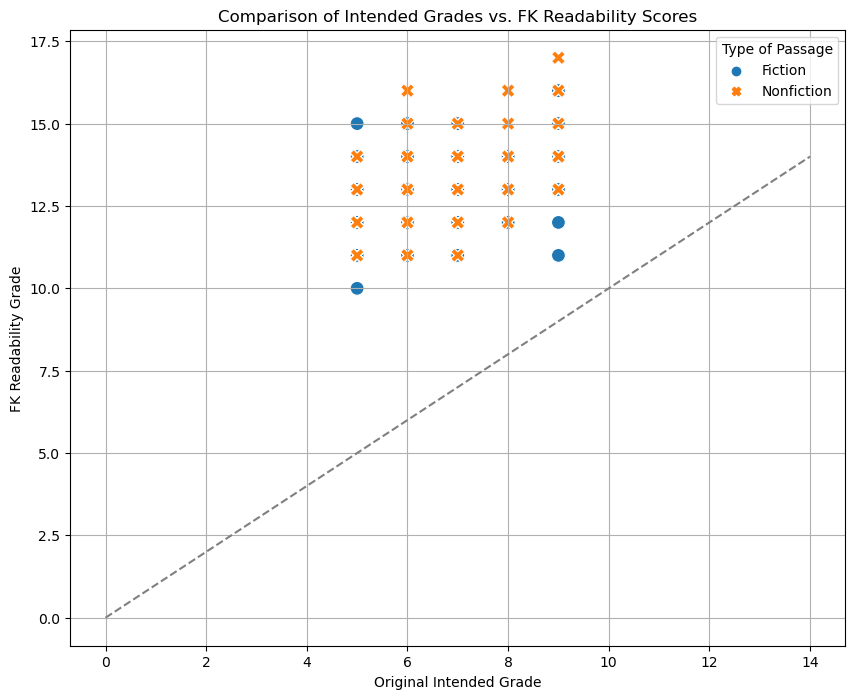

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Original Grade Num', y='FK Original Grade Num', hue='Type of Passage', style='Type of Passage', s=100)

# Add a reference line to indicate perfect agreement
plt.plot([0, 14], [0, 14], color='gray', linestyle='--')

plt.title('Comparison of Intended Grades vs. FK Readability Scores')
plt.xlabel('Original Intended Grade')
plt.ylabel('FK Readability Grade')
plt.grid(True)
plt.legend(title='Type of Passage')
plt.show()


# Reading the visual 

Each point on the plot represents a passage. The x-axis shows the original intended grade, and the y-axis shows the Flesch-Kincaid readability grade. Points above the line indicate texts are more complex than intended, while points below are simpler.

A diagonal gray dashed line shows where the points would lie if the original grade perfectly matched the FK grade.



# Takeaways

- gpt-4-turbo is producing texts that are more complex that the desired reading level on original generation 

# Scoring leveled texts 

In [18]:
# Mapping the 'Leveled Grade' if it's textual to numerical values:
df['Leveled Grade Num'] = df['Leveled Grade'].map(grade_mapping)
df['FK Leveled Grade Num'] = df['Leveled Text Flesch Kincaid Readability Score'].apply(lambda x: round(14 - (x - 50)/10))


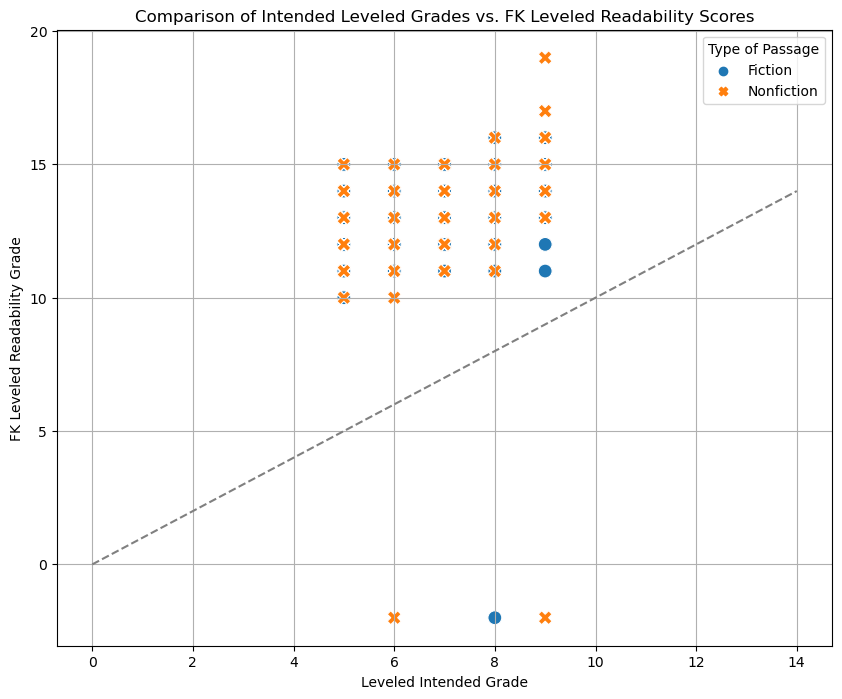

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Leveled Grade Num', y='FK Leveled Grade Num', hue='Type of Passage', style='Type of Passage', s=100)

# Add a reference line to indicate perfect agreement
plt.plot([0, 14], [0, 14], color='gray', linestyle='--')

plt.title('Comparison of Intended Leveled Grades vs. FK Leveled Readability Scores')
plt.xlabel('Leveled Intended Grade')
plt.ylabel('FK Leveled Readability Grade')
plt.grid(True)
plt.legend(title='Type of Passage')
plt.show()


# Reading the visual 

Each point on the plot represents a passage. The x-axis shows the original intended grade, and the y-axis shows the Flesch-Kincaid readability grade. Points above the line indicate texts are more complex than intended, while points below are simpler.

A diagonal gray dashed line shows where the points would lie if the original grade perfectly matched the FK grade.

# Takeaways 
- The outliers are errors in the style of "I am sorry I didn't understand"
- The leveled texts still produces output that is higher than the desired reading level

# Analysis and Where to go from here

It seems that just asking the model to produce texts at a specific level will get you close but not close enough to be usable. The next steps would be to feed it more context from our features. Such as, sentence structure, length, content etc... to see if the performance would improve. Ideally, we could get the model to align with the intended line without having to fine-tune